Importações e carregamento

In [31]:
# Bibliotecas necessárias
import pandas as pd

# Definir o diretório dos dados (opcional, se necessário)
data_dir = './'

# Carregamento dos dados de avaliações
avaliacoes = pd.read_csv(
    data_dir + '/u.data',
    sep='\t',
    names=['usuario_id', 'movie_id', 'nota', 'timestamp']
)

# Renomear as colunas de `avaliacoes` para padronizar
avaliacoes.rename(columns={
    'usuario_id': 'user_id',
    'nota': 'rating'
}, inplace=True)

# Carregamento dos dados dos filmes
movies = pd.read_csv(
    data_dir + '/u.item',
    sep='|',
    encoding='latin-1',
    header=None,
    names=[
        'movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
        'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy',
        'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
        'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
    ]
)

# Não é necessário carregar ratings novamente, pois `avaliacoes já contém os mesmos dados
# ratings = pd.read_csv(   # Comentado porque é redundante
#     data_dir + '/u.data',
#     sep='\t',
#     names=['user_id', 'movie_id', 'rating', 'timestamp']
# )

# Visualizar os primeiros registros dos DataFrames
print("Avaliações:")
print(avaliacoes.head())

print("\nFilmes:")
print(movies.head())

ratings = pd.read_csv(
    data_dir + 'u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp']
)

Avaliações:
   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

Filmes:
   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Sh

Extrair ano de lançamento do filme

In [32]:
# Extraindo o ano de lançamento
movies['year'] = movies['release_date'].str.extract(r'(\d{4})').astype(float)

# Média de avaliação por filme
movie_means = ratings.groupby('movie_id')['rating'].mean().reset_index()
movie_means.columns = ['movie_id', 'mean_rating']
# Unindo ano e média
df = pd.merge(movies[['movie_id', 'year']], movie_means, on='movie_id').dropna()
X = df[['year']].values
y = df['mean_rating'].values

Modelo de Regressão Linear e Treinamento


In [33]:
# Instancia e treina o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X, y)

# Faz as previsões nos dados de treino
y_previsto = modelo.predict(X)

# Avalia o desempenho do modelo
erro_quadratico_medio = mean_squared_error(y, y_previsto)
r2 = r2_score(y, y_previsto)
coeficiente = modelo.coef_[0]
intercepto = modelo.intercept_

# Exibe as métricas e parâmetros do modelo
print(f'Coeficiente da regressão: {coeficiente:.4f}')
print(f'Termo independente (intercepto): {intercepto:.2f}')
print(f'Erro Quadrático Médio (MSE): {erro_quadratico_medio:.2f}')
print(f'Coeficiente de determinação R²: {r2:.4f}')
print(f'Quantidade de filmes analisados: {len(df)}')

Coeficiente da regressão: -0.0130
Termo independente (intercepto): 29.01
Erro Quadrático Médio (MSE): 0.58
Coeficiente de determinação R²: 0.0565
Quantidade de filmes analisados: 1681


Exibição

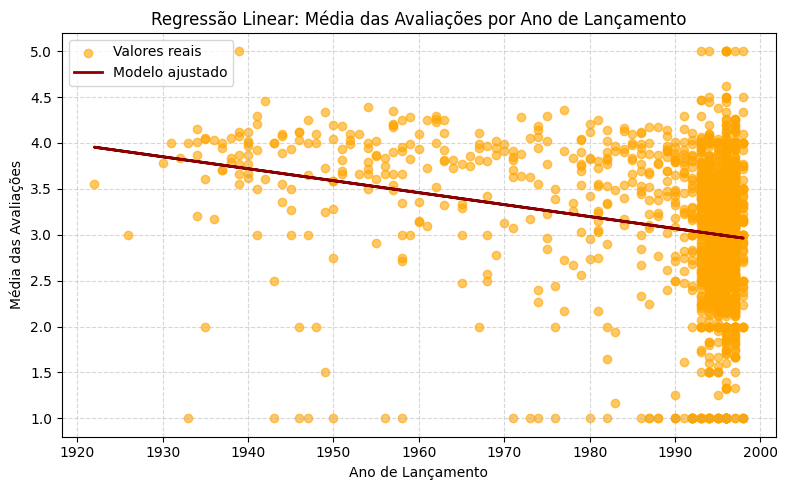

In [37]:
# Visualizando o modelo de regressão ajustado
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.6, color='orange', label='Valores reais')
plt.plot(X, y_previsto, color='darkred', linewidth=2, label='Modelo ajustado')
plt.title('Regressão Linear: Média das Avaliações por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Média das Avaliações')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()